## 프로젝트 1 : 손수 설계하는 선형 회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

df_x = diabetes.data
df_y = diabetes.target

In [2]:
df_x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### (2) 모델에 입력할 데이터 x 준비하기

In [4]:
#numpy array로 변환
import numpy as np

df_x=np.array(df_x)
type(df_x)

numpy.ndarray

### (3) 모델에 예측할 데이터 y 준비하기

In [5]:
#numpy array로 변환
df_y=np.array(df_y)
type(df_y)

numpy.ndarray

### (4) train 데이터와  test 데이터로 분리하기

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


- 442명의 데이터가 훈련 데이터로 353명, 테스트 데이터로 89명으로 분할 
- 353+89=442

### (5) 모델 준비하기

- #442명의 당뇨병 환자에 대해 10개의 기준 변수 사용하여 가중치 10개가 필요
- 랜덤으로 산출

입력 데이터 갯수에 맞는 가중치 w,b

In [7]:
w=np.random.rand(10)
b=np.random.rand()

In [8]:
w

array([0.08730053, 0.91750559, 0.79402638, 0.96593676, 0.5378795 ,
       0.40208888, 0.23866374, 0.26467343, 0.63383431, 0.14796245])

In [9]:
b

0.3154875137486771

모델 함수 구현 

y=w(1)x(1)+w(2)x(2)+....w(9)x(9)+w(10)x(10) + b 구현

In [10]:
def model(x,w,b):
    predictions=0
    
    for i in range(10):
        predictions+=x[:,i]*w[i]
    predictions+=b
    return predictions

### (6) 손실함수 loss 정의하기

손실함수를 MSE로 정의
- 모델이 틀리고 있는 정도를 계산, 값이 작을 수록 좋음



MSE
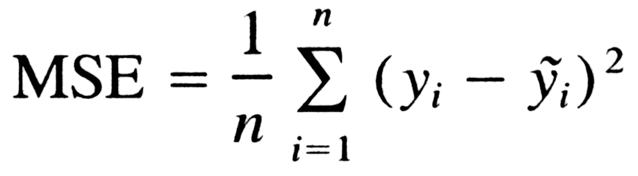

In [11]:
def mse(a,b):
    mse=((a-b)**2).mean()
    return mse

In [12]:
def loss(x,w,b,y):
    predictions=model(x,w,b)
    L=mse(predictions,y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

손실함수는 최적의 매개변수,가중치에 대해 미분해야하므로 현재 모델에서는 10개의 w, 1개의 b에 대해 미분해야함 

mse 식에서 w,b에 대한 편미분 시 다음과 같은 식 도출

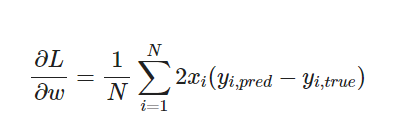
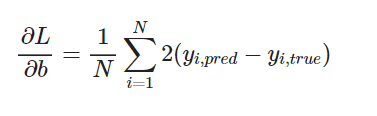
출처: 아이펠 노드 2-9

In [13]:
def gradient(x,w,b,y):
    n=len(w)
    
    #y_pred준비
    y_pred=model(x,w,b)
    
    #w의 gradient 준비
    dw=1/n * 2 * x.T.dot(y_pred-y)
    
    #b의 gradient 준비
    db=2 * (y_pred - y).mean()
    
    return dw,db 

### (8) 하이퍼 파라미터인 학습률 설정하기

In [14]:
learning_rate=0.00005

### (9) 모델 학습하기

In [15]:
losses=[]

for i in range(1,10001):
    dw,db=gradient(x_train,w,b,y_train)
    w-=learning_rate * dw
    b-=learning_rate * db
    L=loss(x_train,w,b,y_train)
    losses.append(L)
    if i % 1000==0:
        print('iteration %d : Loss %0.3f' % (i,L))

iteration 1000 : Loss 25171.429
iteration 2000 : Loss 21528.211
iteration 3000 : Loss 18530.437
iteration 4000 : Loss 16061.829
iteration 5000 : Loss 14027.154
iteration 6000 : Loss 12348.406
iteration 7000 : Loss 10961.692
iteration 8000 : Loss 9814.664
iteration 9000 : Loss 8864.438
iteration 10000 : Loss 8075.870


In [16]:
import matplotlib.pyplot as plt

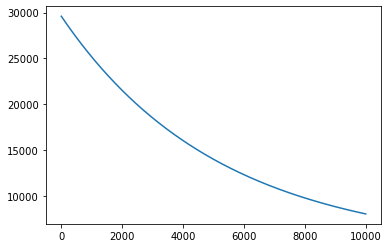

In [17]:
plt.plot(losses)

### (10) 테스트 데이터에 대한 성능 확인하기

In [18]:
prediction = model(x_test, w, b)
mse = loss(x_test, w, b, y_test)
mse

6812.94048803359

학습하지 않은 데이터에 대해 rmse loss값 2867 정도 산출되었다.

### (11) 정답 데이터와 예측한 데이터 시각화하기

x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화

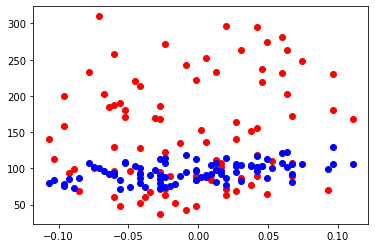

In [19]:
plt.scatter(x_test[:, 0], y_test,c='r') #실제 정답, 빨간색
plt.scatter(x_test[:, 0], prediction,c='b') #예측, 파란색
plt.show()

### 회고

#### learning_rate에 따른 값의 변화 
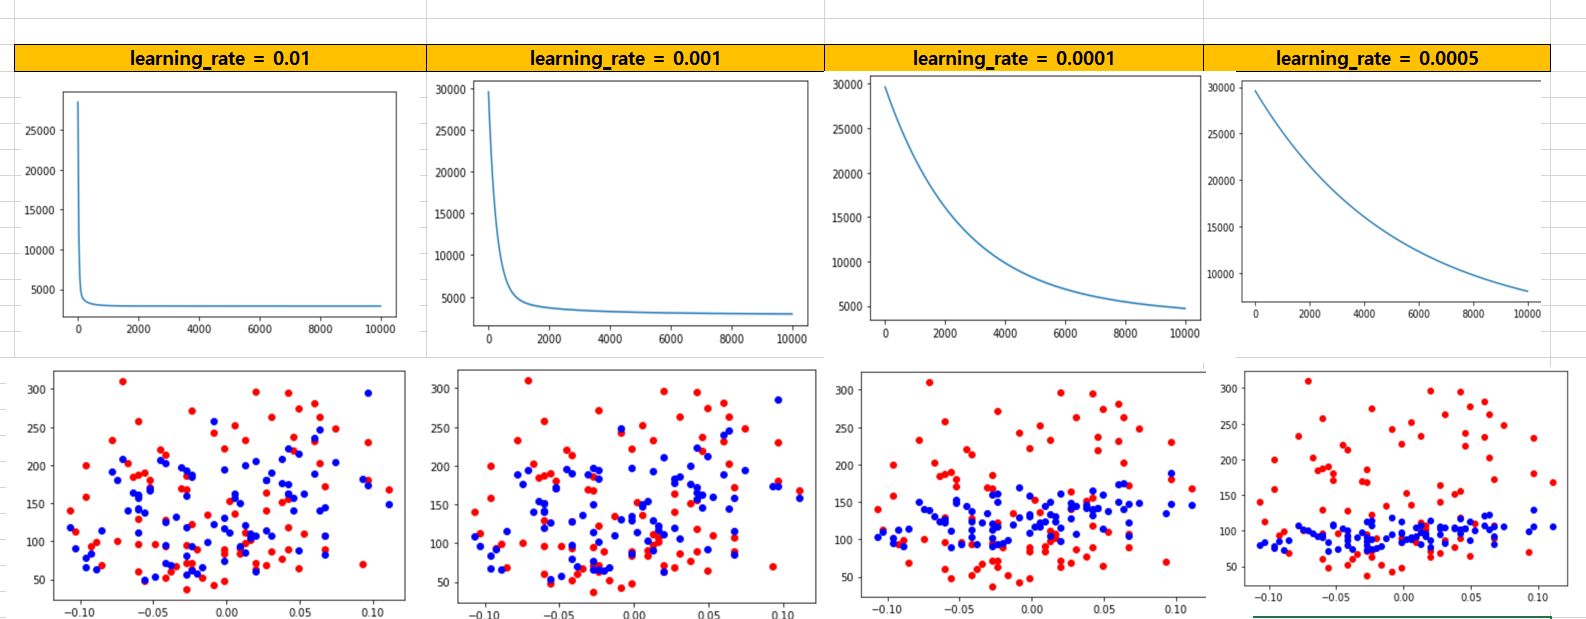
[그래프 1]


학습률 변화를 주어 
반복에 따른 loss값에 따른 함수 (첫번째 칸)과
예측 데이터와 정답의 데이터 분포(두번째 칸)를 비교해보았다.

인터넷에서 찾아보니 반복에 따른 loss값의 함수 모형을 통해 학습률을 비교한 자료가 있어 참조하였다.

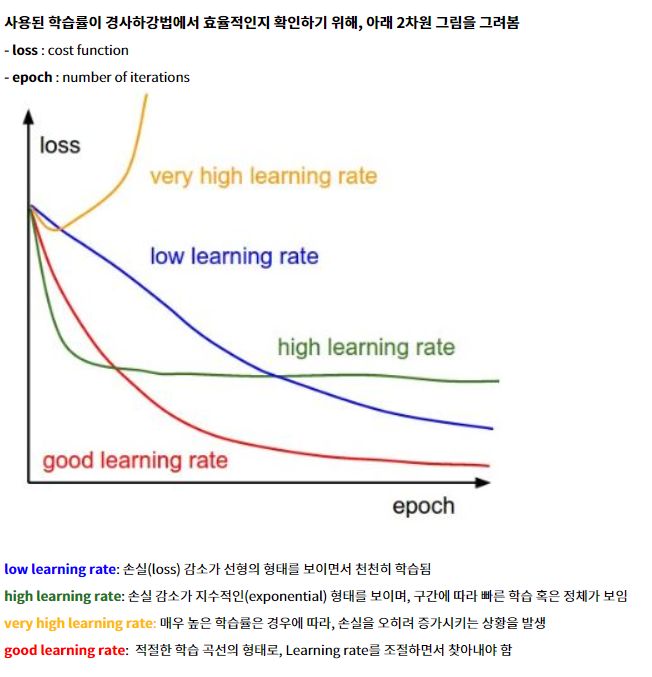
출처 : https://bioinformaticsandme.tistory.com/130
[자료 1]

참조한 자료에 따르면 학습률이 0.01인 경우, high learning rate와 비슷한 양상을 보인다, 손실값이 급격히 수렴하며 빠른 학습 후 정체를 보인다.

학습률이 0.001의 경우,아직 high learning rate와 비슷한 양상을 보인다. 

학습률의 0.0001의 경우,good_learning_rate와 비슷한 양상을 보이고 있다.

학습룰이 0.0005의 경우,  low learning rate와 비슷한 양상을 보인다. 그래프가 선형의 형태를 보이고 있다. 

0.0001dl good_learning_rate와 비슷한 양상을 보이므로 0.0001이 적합한 학습률이라 할 수 있다.